<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>IBF TFIP</h1>
            <h2>Regression with Scikitlearn</h2>
        </th>
    </tr>
</table>

### Multiple Linear Regression

### Please use the dataset below to create a Multiple Linear Regresssion Model
Independent Variables=[[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]

Dependent Variable=[15, 40, 28, 76, 38, 76, 89]

1. Create a Multiple Linear Regression Model
2. Calculate R²
3. Calculate Model Intercept and Model Coefficient
4. Calculate Estimated y value
5. Evaluate the accuracy of the model
6. Plot actual response and the estimated response
7. Plot regression line and the residuals


In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [74]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [8, 10, 40, 28, 64, 44, 76, 86]

In [75]:
x = np.array(x)
y = np.array(y)

In [76]:
print(x.shape)
print(y.shape)

(8, 2)
(8,)


In [77]:
model = LinearRegression().fit(x, y)

In [78]:
r_sq = model.score(x, y)
print(r_sq)

0.8615939258756776


In [79]:
print(model.intercept_)
print(model.coef_)

11.04515855039638
[0.8941393  0.51005096]


In [80]:
y_est = model.predict(x)

In [81]:
y_est, y

(array([11.55520951, 16.025906  , 25.47734994, 35.94889581, 47.95059456,
        58.93219139, 77.56455266, 82.54530011]),
 array([ 8, 10, 40, 28, 64, 44, 76, 86]))

Text(0, 0.5, 'Predicted')

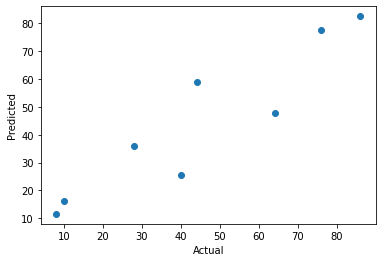

In [82]:
# Plot the Results
# We will plot the scatter plot between actual values and predicted values. Use xlabel to label the x-axis and use ylabel to label the y-axis.
import matplotlib.pyplot as plt
plt.scatter(y,y_est);
plt.xlabel('Actual');
plt.ylabel('Predicted')

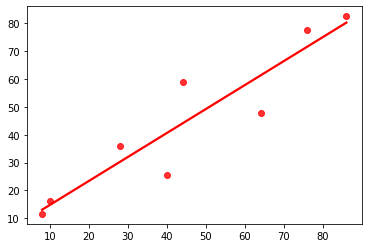

In [83]:
import seaborn as sns
sns.regplot(x=y,y=y_est,ci=None,color ='red');

In [84]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [85]:
model.predict(x_new)

array([11.55520951, 14.36359003, 17.17197055, 19.98035108, 22.7887316 ])

### Polynomial Regression

### Please use the dataset below to create a Polynomial Regresssion Model
Independent Variables=[5, 15, 25, 35, 45, 55]

Dependent Variable=[15, 11, 2, 8, 25, 32]

1. Create a Quadratic Polynomial Regression Model (degrees=2)
2. Calculate Model Intercept and Model Coefficient
3. Calculate R²
5. Calculate Estimated y value
6. Evaluate the accuracy of the model
7. Visualise the model with degrees(2,3,4,5) and compare the same 


In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [87]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [88]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [89]:
x_ = transformer.fit_transform(x)
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [90]:
model = LinearRegression().fit(x_, y)

In [91]:
print(model.intercept_)
print(model.coef_)

21.37232142857144
[-1.32357143  0.02839286]


In [92]:
r_sq = model.score(x_, y)
print(r_sq)

0.8908516262498564


In [93]:
y_est = model.predict(x_)
print(y - y_est)

[-0.46428571  3.09285714 -4.02857143 -1.82857143  5.69285714 -2.46428571]


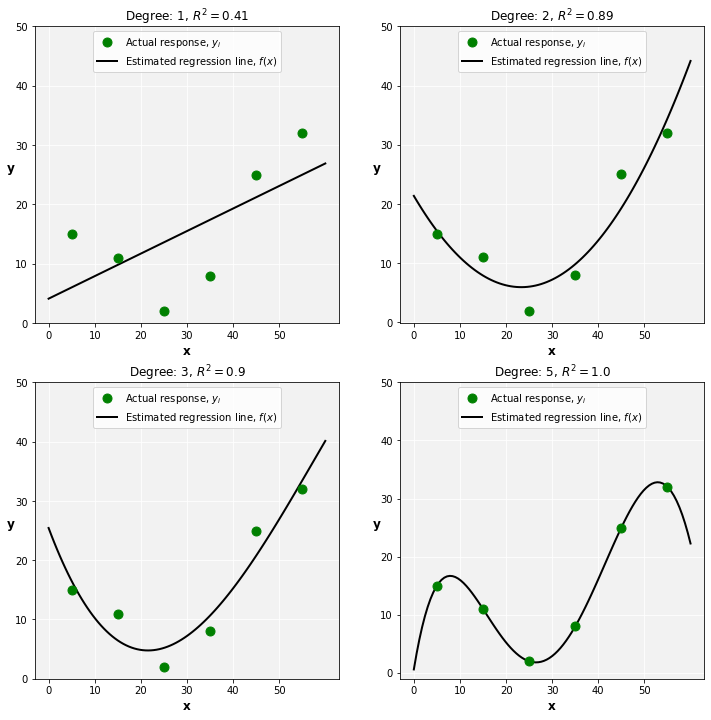

In [94]:
# Visualizing polynomial regression
# Using observations x and y from the dataset to plot the model

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

transformers = []
degrees = [1, 2, 3, 5]
X_ = []
models = []

for k, degree in enumerate(degrees):
    
    transformers.append(PolynomialFeatures(degree=degree, include_bias=False))
    
    X_.append(transformers[k].fit_transform(x))
    
    models.append(LinearRegression().fit(X_[k] , y))

x_min, x_max = 0, 60
x_nodes = np.linspace(x_min, x_max, 101)
    
for k, ax in enumerate(axs.reshape(-1)):
    
    # responses
    ax.plot(x, y, '.g', markersize=18, label=r'Actual response, $y_i$', zorder=3)
    
    # get predicted values on a finer x-grid using the x_nodes array
    x_nodes_transformed = transformers[k].fit_transform(x_nodes.reshape(-1, 1))
    ax.plot(x_nodes, models[k].predict(x_nodes_transformed), 'k', 
            linewidth=2, label=r'Estimated regression line, $f(x)$', zorder=2)
    
    # legend
    ax.legend(loc='upper center')
    
    # title
    deg = f'Degree: {degrees[k]}, '
    R2 = r'$R^2 = $'
    score = str(round(models[k].score(X_[k], y), 2))
    ax.set_title(deg + R2 + score)
        
    # styles, etc.
    ax.set_yticks(range(x_min, x_max, 10))
    ax.set_xticks(range(x_min, x_max, 10))
    ax.grid(color='white')
    ax.set_facecolor((0.95, 0.95, 0.95))
    ax.set_xlabel('x', fontsize=12, fontweight='bold')
    ax.set_ylabel('y', fontsize=12, fontweight='bold', rotation=0)


                **************************> This is the end of our session ******************************

Copyright © 2023 by Boston Consulting Group. All rights reserved.